In [63]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [64]:
####A LITTLE STATISTICS







In [65]:
##1B, "As in class, try integrating the standard normal distribution. This can be done either with the erfc(), or calls to 
##    specific statistical cumulative probability distributions such as stats.norm.cdf() in scipy"

#.cdf is 'cumulitive distrobution function'
x = stats.norm.cdf(-5)
print('probability is ' + str(x))
y=1/x
print('probability is 1/'+str(y))
#Inputting the sigma produces the probability. showing the probability as a fraction helped with observing equality with the familiar 5sigma is 1/3,500,000

probability is 2.866515718791933e-07
probability is 1/3488555.787237898


In [66]:
##1C, "Now more often than not, we actually want to do the inverse: for a given probability determine the associated 'sigma' value: stats.norm.ppf() in python. Try several probability
##     values where you know what the answer should be (e.g. Probability associated with 1, 2, 5 sigma), and show that you get the right answer in terms of sigma."

sigma = stats.norm.ppf(1/3500000)
sigma
print('Sigma is ' + str(sigma))
#Inputting a probability will return the correlating sigma value. Again, 1/3,500,000 was used as a familiar metric to see an output of 5 Sigma.

Sigma is -5.00063143490382


In [67]:
##1D, "If a minus sign appears, think about it and explain the meaning. "

#A positive sign is due to a probability above 0.5, negative for below 0.5. 


In [68]:
##2A "Read up on your distribution"
#Rayleigh

##2B "Make plots (tweaking distribution and plot parameters as needed)""

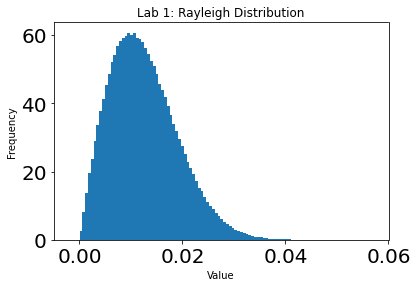

In [69]:
#Rayleigh distrobution using random points.


d = stats.rayleigh.rvs(loc = 0, scale = 0.01, size = 1000000)

ax = plt.hist(d,100, density=True)
plt.xlim(-0.005,0.06)
plt.tick_params(labelsize = 20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Lab 1: Rayleigh Distribution')
plt.show()

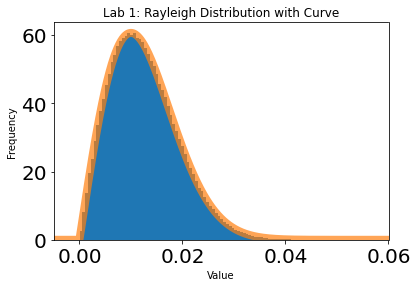

In [70]:
#Rayleigh distrobution using random points. Included curve for visually evaluating accuracy.


fig,ax = plt.subplots(1,1)
ax.hist(d,100,density = True)
plt.tick_params(labelsize = 20)
plt.xlim([-0.005,0.06])
x  = np.linspace(-0.05,0.06,1000)
ax.plot(x,stats.rayleigh.pdf(x,loc = 0., scale = 0.01),linewidth = 8, alpha = 0.7)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Lab 1: Rayleigh Distribution with Curve')
plt.show()

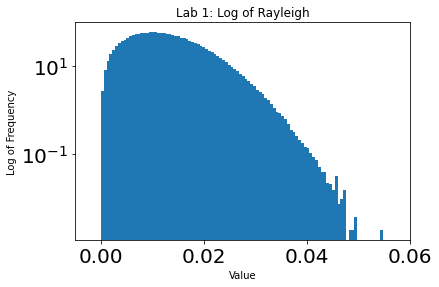

In [71]:
#Rayleigh distrobution using random points, y-axis is logarithmic.

ax = plt.hist(d, 100, density = True)
plt.yscale('log')
plt.tick_params(labelsize = 20)
plt.xlim([-0.005,0.06])
plt.xlabel('Value')
plt.ylabel('Log of Frequency')
plt.title('Lab 1: Log of Rayleigh')
plt.show()

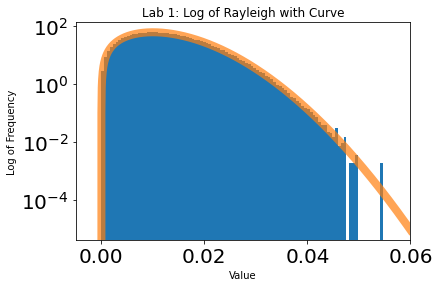

In [72]:
#Rayleigh distrobution using random points, y-axis is logarithmic. Curve is included to vusually evaluate accuracy.

fig,ax = plt.subplots(1,1)
ax.hist(d,100,density = True)
plt.yscale('log')
plt.tick_params(labelsize = 20)
plt.xlim(-0.005,0.06)
plt.title('Lab 1: Log of Rayleigh with Curve')
plt.xlabel('Value')
plt.ylabel('Log of Frequency')
x = np.linspace(-0.005,0.06,1000)
ax.plot(x,stats.rayleigh.pdf(x,loc = 0, scale = 0.01), linewidth = 8, alpha = 0.7)
plt.show()

In [73]:
##3A "Select a value for your hypothetical measurement"
hyp_meas = 0.05

##3B "Clearly state the statistical question you want to ask"
#What is the probability that a measurement of 0.05 is a signal, rather than caused by noise?

##3C "Convert your word question into a mathematical integral"
#int(0.05 to inf) under the logarithmic scaled rayleigh distrobution.

##3D "Use the math to calculate the probability that the background produced the signal (Hint: you will want to use the statistics functions to do the integrals. .cdf() and .ppf() in scipy)."
i = stats.rayleigh.cdf(hyp_meas,loc = 0, scale = 0.01)
print ('probability that this signal is signal-like = '+ str(i))
j = 1-i
(print ('probability that this signal is caused by background noise = ' + str(j)))

probability that this signal is signal-like = 0.999996273346828
probability that this signal is caused by background noise = 3.7266531720536733e-06


In [74]:
##3E "Convert your probability into an equivalent 'sigma'" 

sigma = stats.rayleigh.ppf(i)
print('Sigma = '+str(sigma))

Sigma = 5.000000000001341


In [75]:
##4E "Now explore a little bit. Try various hypothetical measurement values and see how the probabilities and 'sigmas' change. Discuss the patterns that you see. "

#Increaseing the value of the measurement increases the sigma value. As a signal is less probable within the histogram, it becomes more likely that the reading is more signal like.

In [76]:
#### Non-Continuous distributions

#Poisson's







In [77]:
##1A "Read up on the distributions"

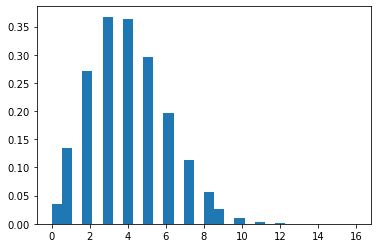

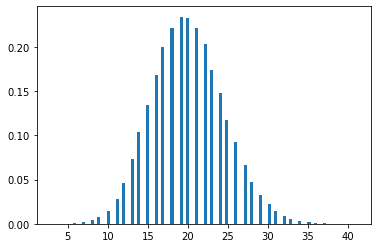

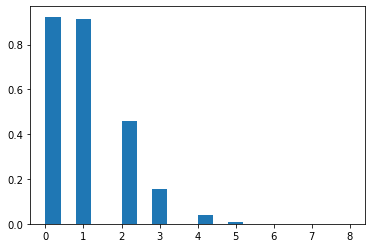

[2 7 3 ... 4 7 5]
[16 13 19 ... 20 17 13]
[1 0 2 ... 1 2 0]


In [78]:
##1B "Make a series of plots with different parameters; and explain the features. (Hint: your plots will need to be discrete, sometimes 'stairs' style plots can be helpful). "

d1 = stats.poisson.rvs(mu=4, loc = 0, size = 100000)
ax = plt.hist(d1, bins = 30, density = True)
plt.show()
#centered at 4, beginning at 0, occuring only at integers

d2 = stats.poisson.rvs(mu=20, loc = 0, size = 100000)
ax = plt.hist(d2, bins = 100, density = True)
plt.show()
#centered at 20, beginning at 0. Appears to be normal distrobution. Occuring only at integers

d3 = stats.poisson.rvs(mu=1, loc = 0, size = 100000)
ax = plt.hist(d3, bins = 20,density = True)
plt.show()
#centered at 1, beginning at 0, occuring only at integers.

print(np.array(d1))
print(np.array(d2))
print(np.array(d3))
#all plots are discontinuous, approaching the normal distrobution as mu increases. Mu must be greater than zero

In [79]:
##1C "Again define a hypothetical question (clearly stated), and calculate the corresponding probability"

#"What is the probability of a measured value being a signal compared to a measurement caused by background noise?"

mea_val = 16
mu=8

ii = stats.poisson.cdf(mea_val, mu)
print('The probability that value is signal-like is ' +str(ii))
jj = 1-ii
print('The probability that the value is caused by noise is ' + str(jj))
stats.poisson.ppf(ii, mu)

The probability that value is signal-like is 0.9962819787187159
The probability that the value is caused by noise is 0.0037180212812840674


16.0

In [80]:
##1D "Because the distributions are discrete, so are the probabilities and 'sigmas'. Think about this and discuss the implications for experiments. "

#The probaility that a value is not an integer is zero. This needs to be remembered for non-continuous distributions since a 
#continuous, smooth line fitting may present positive probability for impossible events.


In [81]:
##1E "While the results are discrete, the parameters of the distributions are not. For example, the mean of a Poisson distribution can be 9.2. Think about and explain why this makes sense
##    and what changes continuously and what doesn't. "

#The mean for the values can be a float value due to the nature of averaging integers. The values themselves however, must be integer values. The mean does not represent any specific point.